In [1]:
%autosave 0

Autosave disabled


# BCI Competition IV Dataset 2a (.mat data)
<p>
Information Given in Documentation

From the documentation it is known that:
<li>25 electrodes are used, first 22 are EEG, last 3 are EOG
<li>Sampling frequency (fs) is 250Hz
<li>9 subjects
<li>9 run (run 1-3 are for eye movement, run 4-9 is MI)

<br>

<b> -- Time Duration-- </b>

1 trials                          = 7-8s  
1 run              = 48 trials    = 336-384s  
1 session = 6 runs = 288 trials   = 2016-2304s  

About the recording of eye movement
<li>run 1 => 2 mins with eyes open
<li>run 2 => 1 min with eyes closed
<li>run 3 => 1 min with eye movements

## Visualizing/ Preparing the Data 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as io
import pandas as pd
from pandas import DataFrame as df

In [3]:
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [4]:
# np.set_printoptions(precision=30, suppress=True)

In [5]:
 # Load the training data of subject 01
data = io.loadmat('./datasets/A01T.mat')

In [6]:
type(data)

dict

In [7]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'data'])

In [8]:
# Store each datasets(X) into variable, each variable contains i th run for 1st subject
EEG_data04 = data['data'][0,3]['X'][0, 0] # Take 1 run from total 6 runs (4th run)
EEG_data05 = data['data'][0,4]['X'][0, 0] # Take 1 run from total 6 runs (5th run)
EEG_data06 = data['data'][0,5]['X'][0, 0] # Take 1 run from total 6 runs (6th run)
EEG_data07 = data['data'][0,6]['X'][0, 0] # Take 1 run from total 6 runs (7th run)
EEG_data08 = data['data'][0,7]['X'][0, 0] # Take 1 run from total 6 runs (8th run)
EEG_data09 = data['data'][0,8]['X'][0, 0] # Take 1 run from total 6 runs (9th run)

In [9]:
# Store each label(y) into variable, each variable contain i th label correspons to 48 trial of each run
y04 = data['data'][0,3]['y'][0, 0].flatten() # Take y data corresponds to 48 trials in 4th run
y05 = data['data'][0,4]['y'][0, 0].flatten() # Take y data corresponds to 48 trials in 5th run
y06 = data['data'][0,5]['y'][0, 0].flatten() # Take y data corresponds to 48 trials in 6th run
y07 = data['data'][0,6]['y'][0, 0].flatten() # Take y data corresponds to 48 trials in 7th run
y08 = data['data'][0,7]['y'][0, 0].flatten() # Take y data corresponds to 48 trials in 8th run
y09 = data['data'][0,8]['y'][0, 0].flatten() # Take y data corresponds to 48 trials in 9th run

In [10]:
y04

array([4, 3, 2, 1, 1, 2, 3, 4, 2, 3, 1, 1, 1, 4, 2, 2, 1, 1, 3, 1, 2, 4,
       4, 3, 1, 4, 4, 2, 4, 4, 2, 1, 2, 3, 3, 3, 4, 3, 1, 4, 2, 3, 2, 3,
       4, 2, 3, 1], dtype=uint8)

In [11]:
# Removing last 3 electrodes from EEG_data since they are EOG
EEG_data04 = EEG_data04[:, :22]
EEG_data05 = EEG_data05[:, :22]
EEG_data06 = EEG_data06[:, :22]
EEG_data07 = EEG_data07[:, :22]
EEG_data08 = EEG_data08[:, :22]
EEG_data09 = EEG_data09[:, :22]

In [12]:
# Creating columns for X datasets
Xcol = []
for i in range(1, 23):
    if i < 11:
        Xcol.append('EEG0'+str(i))
    else:
        Xcol.append('EEG'+str(i))

In [15]:
# Visualizing the dataset of X
dataX04 = pd.DataFrame(EEG_data09, columns=Xcol)
dataX04.head()

,EEG01,EEG02,EEG03,EEG04,EEG05,EEG06,EEG07,EEG08,EEG09,EEG010,...,EEG13,EEG14,EEG15,EEG16,EEG17,EEG18,EEG19,EEG20,EEG21,EEG22
0,-15.283203,-13.330078,-12.158203,-10.742188,-7.617188,-3.759766,-11.279297,-11.865234,-8.398438,-6.347656,...,-4.833984,-6.005859,-7.226562,-4.150391,-3.173828,-6.347656,-3.759766,-5.517578,-4.785156,-3.564453
1,-13.427734,-11.181641,-10.791016,-8.886719,-6.689453,-2.636719,-5.175781,-7.617188,-6.054688,-5.712891,...,-4.638672,-2.392578,-4.248047,-3.564453,-2.197266,-5.419922,-0.439453,-2.929688,-3.076172,-0.830078
2,-20.800781,-20.312500,-18.896484,-16.699219,-14.062500,-11.962891,-11.767578,-15.332031,-13.232422,-13.867188,...,-12.304688,-9.863281,-10.546875,-11.816406,-11.767578,-15.966797,-8.056641,-10.693359,-10.937500,-7.470703
3,-21.630859,-20.361328,-19.677734,-18.652344,-14.794922,-13.037109,-9.277344,-13.623047,-12.402344,-15.820312,...,-8.935547,-10.644531,-10.351562,-12.500000,-13.476562,-16.894531,-8.496094,-11.425781,-11.376953,-8.691406
4,-21.386719,-18.994141,-18.847656,-18.212891,-14.306641,-12.597656,-10.253906,-11.767578,-11.914062,-14.501953,...,-9.619141,-11.279297,-10.107422,-12.695312,-12.109375,-15.039062,-9.033203,-10.009766,-10.546875,-10.253906


In [17]:
m, n = EEG_data04.shape
print('There are %d samples' %m )
print('There are %d electrodes' %n)

There are 96735 samples
There are 22 electrodes


In [18]:
# Visualizing the label of y
data_y04 = pd.DataFrame(y04, columns=['class'])
data_y04.head()

,class
0,4
1,3
2,2
3,1
4,1


In [19]:
data_y04.shape

(48, 1)

## Clipping of EEG_data, fetch data correspond to MI task


    Assumption:

    The MI start at 2s -> 500th
    Recording last for 3s -> 1250 samples
    Each trial ends at 8-> 2000th
    e.g.:
    1st trial -> clip 500- 1250
    2nd trial -> clip 2500- 3250
    3rd trial -> clip 4500- 5250

In [20]:
EEG_data04.shape

(96735, 22)

In [21]:
# One trial last nth samples (x seconds)
# Fetch nth - nth samples  (MI task, x seconds)
ntrial = 48 # Number of trial
dur = 2000 # Duration of each trial
fs = 250 # Sampling frequency
t = 3 # Assume the recording last for exactly 3s in each trial
start = 499 # Start trimming at 500th sample
ending = 1249 # Ending of each MI recording
nsamp = 750 # Samples of MI task per trial to be trimmed
nel = 22 # Number of all electrodes (minuse EOG)

In [22]:
# Preparing array to store each run data
run04 = np.zeros((ntrial, nsamp, nel))
run05 = np.zeros((ntrial, nsamp, nel))
run06 = np.zeros((ntrial, nsamp, nel))
run07 = np.zeros((ntrial, nsamp, nel))
run08 = np.zeros((ntrial, nsamp, nel))
run09 = np.zeros((ntrial, nsamp, nel))

In [23]:
# Check shape of run
run04.shape

(48, 750, 22)

In [24]:
# Iter over each EEG_data and trimmed samples corresponds to MI task 
# Array will contain data of MI task in each run
for i in range(ntrial):
    temp = EEG_data04[(dur*i+start):(dur*i+ending),:]
    run04[i, :, :] = temp
    
for i in range(ntrial):
    temp = EEG_data05[(dur*i+start):(dur*i+ending),:]
    run05[i, :, :] = temp

for i in range(ntrial):
    temp = EEG_data06[(dur*i+start):(dur*i+ending),:]
    run06[i, :, :] = temp

for i in range(ntrial):
    temp = EEG_data07[(dur*i+start):(dur*i+ending),:]
    run07[i, :, :] = temp

for i in range(ntrial):
    temp = EEG_data08[(dur*i+start):(dur*i+ending),:]
    run08[i, :, :] = temp

for i in range(ntrial):
    temp = EEG_data09[(dur*i+start):(dur*i+ending),:]
    run09[i, :, :] = temp

In [25]:
run08.shape

(48, 750, 22)

In [26]:
# Visualizing data of run 09 trial 19
pd.DataFrame(run04[0], columns=Xcol)

,EEG01,EEG02,EEG03,EEG04,EEG05,EEG06,EEG07,EEG08,EEG09,EEG010,...,EEG13,EEG14,EEG15,EEG16,EEG17,EEG18,EEG19,EEG20,EEG21,EEG22
0,22.314453,15.673828,21.386719,26.416016,27.539062,26.904297,10.986328,16.162109,22.021484,24.951172,...,19.335938,17.431641,21.435547,24.169922,24.951172,25.195312,22.021484,24.218750,24.853516,22.167969
1,18.945312,12.109375,17.138672,22.265625,24.316406,23.730469,8.203125,12.597656,17.089844,20.751953,...,17.236328,12.451172,17.529297,20.019531,19.628906,19.677734,17.138672,19.189453,20.410156,18.701172
2,16.455078,10.888672,15.087891,18.701172,22.509766,20.361328,7.812500,10.595703,14.501953,17.187500,...,15.234375,8.593750,13.964844,15.234375,17.626953,17.626953,14.208984,16.162109,16.845703,14.892578
3,14.941406,10.937500,13.720703,16.992188,19.287109,20.556641,8.300781,9.716797,12.060547,14.501953,...,14.062500,7.275391,10.449219,12.304688,12.939453,13.867188,9.960938,10.839844,12.207031,8.544922
4,11.669922,9.130859,9.912109,12.597656,14.550781,15.917969,10.742188,10.009766,9.472656,9.033203,...,11.718750,7.958984,8.154297,8.593750,9.765625,10.058594,8.007812,6.884766,7.519531,5.419922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,1.611328,0.927734,0.585938,4.394531,1.464844,-0.097656,2.490234,3.173828,2.392578,1.464844,...,-5.078125,4.882812,2.343750,0.732422,2.734375,0.439453,3.515625,2.197266,1.464844,2.001953
746,-4.785156,-5.908203,-8.056641,-0.732422,-3.564453,-0.830078,-3.417969,-3.515625,-7.128906,-5.712891,...,-4.443359,0.488281,-5.419922,-5.224609,-3.564453,-2.343750,-2.246094,-3.710938,-3.027344,-2.392578
747,-2.734375,-5.761719,-5.957031,-1.123047,0.244141,2.001953,1.123047,-2.343750,-5.175781,-4.443359,...,1.513672,2.685547,-2.246094,-3.808594,1.904297,5.273438,2.978516,2.148438,3.759766,3.613281
748,-5.859375,-7.617188,-9.472656,-5.566406,-4.736328,-2.880859,-1.025391,-6.542969,-10.742188,-9.277344,...,-1.123047,-0.683594,-7.519531,-8.447266,-2.978516,1.708984,-2.441406,-2.978516,-0.878906,-1.855469


## Grab indices from each trial which belong label 1 and 2

In [27]:
# Grab index from each trial that has label 1 and 2
# From run 04
idx_l04 = np.argwhere(y04==1).flatten() # Array containing trial classified as left
idx_r04 = np.argwhere(y04==2).flatten() # Array containing trial classified as right

# From run 05
idx_l05 = np.argwhere(y05==1).flatten() # Array containing trial classified as left
idx_r05 = np.argwhere(y05==2).flatten() # Array containing trial classified as right

# From run 06
idx_l06 = np.argwhere(y06==1).flatten() # Array containing trial classified as left
idx_r06 = np.argwhere(y06==2).flatten() # Array containing trial classified as right

# From run 07
idx_l07 = np.argwhere(y07==1).flatten() # Array containing trial classified as left
idx_r07 = np.argwhere(y07==2).flatten() # Array containing trial classified as right

# From run 08
idx_l08 = np.argwhere(y08==1).flatten() # Array containing trial classified as left
idx_r08 = np.argwhere(y08==2).flatten() # Array containing trial classified as right

# From run 09
idx_l09 = np.argwhere(y09==1).flatten() # Array containing trial classified as left
idx_r09 = np.argwhere(y09==2).flatten() # Array containing trial classified as right

In [28]:
# idx array will look like this
print('idx array look like this: ', idx_l08)

idx array look like this:  [ 1  5  6 13 25 29 31 33 34 35 36 46]


## Take 12 trials that belong to left & right class of each run

    E denotes matrix of sample x electrodes x trial
                        750    x      22    x 12

In [29]:
# Creating matrix of left class from all run
El04 = run04[idx_l04, :, :] # Run 4 left class
El05 = run05[idx_l05, :, :] # Run 5 left class
El06 = run06[idx_l06, :, :] # Run 6 left class
El07 = run07[idx_l07, :, :] # Run 7 left class
El08 = run08[idx_l08, :, :] # Run 8 left class
El09 = run09[idx_l09, :, :] # Run 9 left class

In [30]:
# Creating matrix of right class from all run
Er04 = run04[idx_r04, :, :] # Run 4 right class
Er05 = run05[idx_r05, :, :] # Run 5 right class
Er06 = run06[idx_r06, :, :] # Run 6 right class
Er07 = run07[idx_r07, :, :] # Run 7 right class
Er08 = run08[idx_r08, :, :] # Run 8 right class
Er09 = run09[idx_r09, :, :] # Run 9 right class

In [31]:
df(El04[0], columns=Xcol)

,EEG01,EEG02,EEG03,EEG04,EEG05,EEG06,EEG07,EEG08,EEG09,EEG010,...,EEG13,EEG14,EEG15,EEG16,EEG17,EEG18,EEG19,EEG20,EEG21,EEG22
0,13.525391,14.990234,12.939453,14.794922,6.591797,5.419922,1.611328,4.736328,7.080078,6.591797,...,1.562500,-3.613281,-0.976562,1.464844,1.269531,1.855469,-2.148438,-1.855469,1.318359,0.537109
1,18.798828,14.697266,17.187500,16.748047,10.107422,5.371094,2.636719,3.515625,9.179688,7.714844,...,2.978516,-6.396484,1.464844,0.732422,0.146484,0.390625,-3.808594,-1.416016,1.855469,1.806641
2,19.726562,15.527344,16.113281,19.140625,11.181641,7.373047,0.292969,2.148438,7.666016,7.763672,...,2.197266,-8.642578,-1.416016,0.585938,1.171875,0.830078,-4.394531,-0.878906,1.416016,2.246094
3,18.945312,9.960938,12.548828,16.943359,10.888672,7.812500,-3.759766,-2.832031,5.126953,6.835938,...,1.416016,-10.449219,-2.246094,0.976562,3.173828,2.539062,-4.296875,0.292969,3.564453,4.345703
4,17.919922,6.835938,10.888672,14.697266,9.667969,5.517578,-3.125000,-5.273438,4.003906,4.882812,...,-2.587891,-9.521484,-2.441406,1.464844,1.562500,0.195312,-3.857422,0.146484,2.978516,4.541016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,3.076172,8.154297,6.005859,9.228516,9.326172,10.693359,5.371094,9.423828,12.011719,16.503906,...,8.593750,12.841797,13.427734,17.333984,14.599609,13.476562,12.597656,12.695312,11.132812,8.203125
746,1.757812,4.882812,5.175781,4.003906,7.470703,5.810547,8.056641,7.861328,12.451172,12.255859,...,8.544922,10.498047,15.429688,14.111328,10.937500,8.691406,11.865234,11.816406,9.912109,8.154297
747,1.074219,4.589844,4.150391,1.708984,5.175781,2.441406,9.667969,8.251953,11.669922,9.912109,...,5.761719,10.253906,14.843750,12.646484,11.621094,9.814453,12.792969,13.037109,10.888672,10.693359
748,-1.416016,5.664062,1.171875,-0.683594,2.001953,2.880859,10.156250,10.253906,9.667969,7.861328,...,5.517578,12.548828,13.134766,12.646484,10.839844,10.693359,13.818359,13.867188,11.425781,13.623047


In [32]:
# Shape of each El and Er are
print('Shape of each El0x:',El04.shape,
      'Shape of each Er0x:',Er05.shape)

Shape of each El0x: (12, 750, 22) Shape of each Er0x: (12, 750, 22)


In [33]:
# Create E_right and E_left consist of right and left classes from all runs
E_left = np.concatenate((El04, El05, El06, El07, El08, El09), axis=0)
E_right = np.concatenate((Er04, Er05, Er06, Er07, Er08, Er09), axis=0)

In [34]:
# E_left and E_right should have dimension of 72 x 750 x 25
print('One run has 12 left and right each, there are 6 runs \nThus, dimension of E_left and E_right should be 72, 750, 25:')
print(E_left.shape, E_right.shape)

One run has 12 left and right each, there are 6 runs 
Thus, dimension of E_left and E_right should be 72, 750, 25:
(72, 750, 22) (72, 750, 22)


In [35]:
pd.DataFrame(E_right[71, :, :], columns=Xcol)

,EEG01,EEG02,EEG03,EEG04,EEG05,EEG06,EEG07,EEG08,EEG09,EEG010,...,EEG13,EEG14,EEG15,EEG16,EEG17,EEG18,EEG19,EEG20,EEG21,EEG22
0,0.195312,-3.466797,0.195312,-2.148438,1.513672,-3.271484,0.781250,-1.562500,2.636719,-0.341797,...,-4.589844,2.685547,3.906250,0.488281,-4.150391,-2.441406,5.517578,4.199219,2.490234,7.763672
1,7.617188,7.910156,7.958984,8.935547,9.179688,8.154297,9.472656,9.423828,8.740234,11.181641,...,3.173828,11.425781,9.619141,10.351562,6.445312,9.619141,12.353516,13.281250,11.962891,14.404297
2,5.224609,2.685547,4.687500,6.347656,5.761719,6.298828,3.515625,4.492188,6.201172,6.542969,...,3.271484,8.496094,7.275391,8.349609,3.125000,8.007812,8.740234,9.912109,8.837891,10.791016
3,5.957031,4.687500,4.345703,7.226562,7.470703,11.376953,6.054688,7.470703,7.421875,9.814453,...,8.837891,12.011719,8.544922,11.230469,6.103516,12.744141,10.839844,12.451172,12.109375,12.646484
4,6.982422,5.566406,4.638672,6.738281,6.005859,9.667969,10.498047,8.789062,8.789062,8.300781,...,9.619141,12.451172,10.400391,9.716797,5.566406,12.890625,12.451172,13.085938,12.109375,14.453125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,-11.425781,-10.937500,-10.302734,-14.355469,-10.009766,-13.378906,-1.367188,-9.619141,-9.472656,-12.597656,...,-6.005859,-9.033203,-7.324219,-10.302734,-8.251953,-8.984375,-5.126953,-2.587891,-3.271484,3.027344
746,-15.576172,-12.548828,-12.890625,-17.382812,-11.474609,-15.332031,-6.201172,-12.353516,-11.425781,-14.501953,...,-6.787109,-13.183594,-10.156250,-12.451172,-8.056641,-8.886719,-5.957031,-4.150391,-3.906250,2.490234
747,-9.765625,-7.373047,-7.861328,-9.521484,-5.029297,-7.324219,-0.439453,-7.617188,-5.175781,-7.763672,...,0.439453,-7.958984,-4.492188,-6.298828,-1.806641,-1.904297,-1.318359,1.171875,0.927734,6.787109
748,-7.568359,-4.687500,-5.322266,-8.203125,-3.417969,-6.054688,1.269531,-4.248047,-2.880859,-6.103516,...,1.220703,-4.687500,-2.441406,-4.003906,0.634766,0.244141,1.269531,2.978516,2.783203,7.080078


## Perform CAR(common average reference) to dataset

In [36]:
# print('Perform CAR in each class, left and right. Executing...')
# CAR value of left class
# avgleft = np.mean(E_left, axis=2)[:, :, np.newaxis]
# CAR_left = E_left - avgleft;

# CAR value of right class
# avgright = np.mean(E_right, axis=2)[:, :, np.newaxis]
# CAR_right = E_right - avgright;

In [37]:
# Don't compute the CAR, thus

In [38]:
# pd.DataFrame(CAR_left[48, :, :], columns=Xcol)

In [39]:
# CAR_left.shape, CAR_right.shape

## Divide dataset into training data and test data

In [40]:
# First transform the dimension of each sheet of CAR array to N x T
E_left = np.transpose(E_left, (0, 2, 1))
E_right = np.transpose(E_right, (0, 2, 1))

In [41]:
# Check dimension of shape of CAR_left and CAR_right
print('Transform E_left and E_right dimension to 72 x 22 x 750, that is trial x n_el x samples\n')
print('E_left now has dimension of: ', E_left.shape)
print('E_right now has dimension of: ', E_right.shape)

Transform E_left and E_right dimension to 72 x 22 x 750, that is trial x n_el x samples

E_left now has dimension of:  (72, 22, 750)
E_right now has dimension of:  (72, 22, 750)


In [42]:
# Take 54 data of each left and right data as training data
ntrain = 54
E_left_tr = E_left[:ntrain, :, :]
E_right_tr = E_right[:ntrain, :, :]
print('Take 54 data of each left and right data as training data\n')
print('E_left_tr has dimension of: ', E_left_tr.shape)
print('E_right_tr has dimension of: ', E_right_tr.shape)

Take 54 data of each left and right data as training data

E_left_tr has dimension of:  (54, 22, 750)
E_right_tr has dimension of:  (54, 22, 750)


In [43]:
# Take 18 data of each left and right data as train data
ntest = 18
E_left_te = E_left[ntrain:ntrain+ntest, :, :]
E_right_te = E_right[ntrain:ntrain+ntest, :, :]
print('Take 18 data of each left and right data as train data\n')
print('E_left_te has dimension of: ', E_left_te.shape)
print('E_right_te has dimension of: ', E_right_te.shape)

Take 18 data of each left and right data as train data

E_left_te has dimension of:  (18, 22, 750)
E_right_te has dimension of:  (18, 22, 750)


## Processing Training Data

### Calculate spatial covariance of each trial 
Calculating normalized spatial covariance of each trial and composite variance
$$ C = \frac{EE'}{trace(EE')}$$
' denotes transpose

In [44]:
print('Compute covariance of E_left_tr and E_right_tr...\n')
Cov_left_tr = np.zeros((ntrain, nel, nel))
Cov_right_tr = np.zeros((ntrain, nel, nel))

for i in range(ntrain):
    Cov_left_tr[i, :, :] = (E_left_tr[i, :, :]@E_left_tr[i, :, :].T)/np.trace(E_left_tr[i, :, :]@E_left_tr[i, :, :].T)

for i in range(ntrain):
    Cov_right_tr[i, :, :] = (E_right_tr[i, :, :]@E_right_tr[i, :, :].T)/np.trace(E_right_tr[i, :, :]@E_right_tr[i, :, :].T)

print('Cov_left_tr has dimension of: ', Cov_left_tr.shape)
print('Cov_right_tr has dimension of: ', Cov_right_tr.shape)

Compute covariance of E_left_tr and E_right_tr...

Cov_left_tr has dimension of:  (54, 22, 22)
Cov_right_tr has dimension of:  (54, 22, 22)


In [45]:
df(Cov_right_tr[22])

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.056130,0.046808,0.054281,0.059174,0.054563,0.050461,0.026399,0.035272,0.044195,0.049713,...,0.034282,0.026455,0.034575,0.037263,0.036811,0.033900,0.022324,0.026840,0.025921,0.016940
1,0.046808,0.048016,0.051280,0.053088,0.046591,0.042278,0.030753,0.040462,0.045115,0.048880,...,0.027739,0.033257,0.037762,0.039286,0.035840,0.031280,0.027390,0.029664,0.026915,0.020623
2,0.054281,0.051280,0.058267,0.060727,0.054338,0.048515,0.031949,0.042428,0.050638,0.054793,...,0.032567,0.034565,0.041907,0.043789,0.040748,0.035510,0.029497,0.032593,0.029786,0.021762
3,0.059174,0.053088,0.060727,0.068948,0.059300,0.055935,0.030537,0.042727,0.051850,0.059053,...,0.037202,0.034633,0.041691,0.046672,0.043975,0.039813,0.029628,0.033819,0.031967,0.022302
4,0.054563,0.046591,0.054338,0.059300,0.056755,0.052550,0.027647,0.037054,0.046530,0.052963,...,0.037651,0.029457,0.038499,0.041283,0.041290,0.038612,0.026171,0.031472,0.030689,0.021425
5,0.050461,0.042278,0.048515,0.055935,0.052550,0.052071,0.024137,0.033486,0.041013,0.048354,...,0.038063,0.026886,0.033684,0.038165,0.038820,0.038061,0.023897,0.029185,0.029533,0.020744
6,0.026399,0.030753,0.031949,0.030537,0.027647,0.024137,0.029248,0.031861,0.032024,0.031051,...,0.018999,0.030500,0.030696,0.028270,0.025115,0.021995,0.025874,0.024412,0.021421,0.019847
7,0.035272,0.040462,0.042428,0.042727,0.037054,0.033486,0.031861,0.040813,0.042227,0.043102,...,0.023675,0.038653,0.039698,0.038750,0.033769,0.029059,0.032900,0.032027,0.027787,0.024789
8,0.044195,0.045115,0.050638,0.051850,0.046530,0.041013,0.032024,0.042227,0.048767,0.050883,...,0.029220,0.038586,0.044052,0.044094,0.039884,0.034593,0.034099,0.035327,0.031322,0.025591
9,0.049713,0.048880,0.054793,0.059053,0.052963,0.048354,0.031051,0.043102,0.050883,0.057402,...,0.033791,0.037727,0.044872,0.047776,0.044241,0.039369,0.033143,0.036911,0.033803,0.025524


### Compute average composite covariance 
First calculate the average of left and right covariance:
$$\overline{C}_d, \epsilon[l, r]$$

The composite average covariance is given as:
$$ C_c = \overline{C_l} + \overline{C_r}$$


In [46]:
print('Compute avg covariance of left and right class for training...\n')
avgCov_l_tr = np.sum(Cov_left_tr, axis=0)/Cov_left_tr.shape[0]
avgCov_r_tr = np.sum(Cov_right_tr, axis=0)/Cov_right_tr.shape[0]
print('Cov_left_tr has dimension of: ', avgCov_l_tr.shape)
print('Cov_right_tr has dimension of: ', avgCov_r_tr.shape)

Compute avg covariance of left and right class for training...

Cov_left_tr has dimension of:  (22, 22)
Cov_right_tr has dimension of:  (22, 22)


In [47]:
# Composite spatial covariance
print('Calculating composite covariance...\n')
avgCov_c_tr = avgCov_l_tr + avgCov_r_tr
print('Size of avgCov_c_tr = ', avgCov_c_tr.shape)

Calculating composite covariance...

Size of avgCov_c_tr =  (22, 22)


In [48]:
pd.DataFrame(avgCov_c_tr)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.106679,0.089992,0.100695,0.104816,0.100999,0.092209,0.060367,0.075856,0.088234,0.094626,...,0.063419,0.066334,0.075833,0.077680,0.076259,0.069931,0.060242,0.063954,0.060541,0.049724
1,0.089992,0.091447,0.094713,0.095758,0.087681,0.080195,0.064361,0.080912,0.086922,0.091470,...,0.054047,0.072128,0.076611,0.078072,0.073126,0.065328,0.063740,0.065149,0.060043,0.051626
2,0.100695,0.094713,0.105594,0.106033,0.100158,0.088831,0.066415,0.083983,0.096134,0.101482,...,0.061800,0.075150,0.084717,0.085688,0.081934,0.073520,0.068793,0.071635,0.066596,0.056334
3,0.104816,0.095758,0.106033,0.115386,0.105974,0.097722,0.063424,0.084453,0.096794,0.107569,...,0.065847,0.076453,0.085015,0.090333,0.086553,0.078007,0.069497,0.073594,0.069292,0.057238
4,0.100999,0.087681,0.100158,0.105974,0.105433,0.097318,0.060687,0.078437,0.092690,0.101553,...,0.070486,0.071162,0.082926,0.086394,0.085744,0.079517,0.067536,0.072717,0.069659,0.057122
5,0.092209,0.080195,0.088831,0.097722,0.097318,0.097182,0.054007,0.071765,0.082078,0.093090,...,0.071466,0.065938,0.073939,0.080403,0.081021,0.077686,0.062176,0.067611,0.066338,0.053704
6,0.060367,0.064361,0.066415,0.063424,0.060687,0.054007,0.059422,0.063902,0.066021,0.064728,...,0.041910,0.061535,0.062949,0.059828,0.056316,0.050920,0.055868,0.054770,0.049726,0.045937
7,0.075856,0.080912,0.083983,0.084453,0.078437,0.071765,0.063902,0.080258,0.083911,0.086754,...,0.051778,0.075840,0.079000,0.079498,0.073529,0.065324,0.069733,0.069941,0.063961,0.057375
8,0.088234,0.086922,0.096134,0.096794,0.092690,0.082078,0.066021,0.083911,0.095902,0.099192,...,0.060748,0.078871,0.088675,0.089423,0.084320,0.074495,0.075334,0.077778,0.071841,0.062451
9,0.094626,0.091470,0.101482,0.107569,0.101553,0.093090,0.064728,0.086754,0.099192,0.111173,...,0.066727,0.082122,0.092183,0.098351,0.093138,0.084226,0.078399,0.083306,0.078063,0.066804


### Decompose the covariance matrix
Eigendecompose matrix $C_c$, such that
$$C_c = U_c\lambda_cU'_c$$
The eigenvalues in this calculated are sorted in descending order

In [49]:
avgCov_c_tr.shape

(22, 22)

In [50]:
# Try using np.linalg eigenvalue
# λ, V = np.linalg.eig(avgCov_c_tr)
λ, V = np.linalg.eig(avgCov_c_tr)

In [51]:
df(avgCov_c_tr)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.106679,0.089992,0.100695,0.104816,0.100999,0.092209,0.060367,0.075856,0.088234,0.094626,...,0.063419,0.066334,0.075833,0.077680,0.076259,0.069931,0.060242,0.063954,0.060541,0.049724
1,0.089992,0.091447,0.094713,0.095758,0.087681,0.080195,0.064361,0.080912,0.086922,0.091470,...,0.054047,0.072128,0.076611,0.078072,0.073126,0.065328,0.063740,0.065149,0.060043,0.051626
2,0.100695,0.094713,0.105594,0.106033,0.100158,0.088831,0.066415,0.083983,0.096134,0.101482,...,0.061800,0.075150,0.084717,0.085688,0.081934,0.073520,0.068793,0.071635,0.066596,0.056334
3,0.104816,0.095758,0.106033,0.115386,0.105974,0.097722,0.063424,0.084453,0.096794,0.107569,...,0.065847,0.076453,0.085015,0.090333,0.086553,0.078007,0.069497,0.073594,0.069292,0.057238
4,0.100999,0.087681,0.100158,0.105974,0.105433,0.097318,0.060687,0.078437,0.092690,0.101553,...,0.070486,0.071162,0.082926,0.086394,0.085744,0.079517,0.067536,0.072717,0.069659,0.057122
5,0.092209,0.080195,0.088831,0.097722,0.097318,0.097182,0.054007,0.071765,0.082078,0.093090,...,0.071466,0.065938,0.073939,0.080403,0.081021,0.077686,0.062176,0.067611,0.066338,0.053704
6,0.060367,0.064361,0.066415,0.063424,0.060687,0.054007,0.059422,0.063902,0.066021,0.064728,...,0.041910,0.061535,0.062949,0.059828,0.056316,0.050920,0.055868,0.054770,0.049726,0.045937
7,0.075856,0.080912,0.083983,0.084453,0.078437,0.071765,0.063902,0.080258,0.083911,0.086754,...,0.051778,0.075840,0.079000,0.079498,0.073529,0.065324,0.069733,0.069941,0.063961,0.057375
8,0.088234,0.086922,0.096134,0.096794,0.092690,0.082078,0.066021,0.083911,0.095902,0.099192,...,0.060748,0.078871,0.088675,0.089423,0.084320,0.074495,0.075334,0.077778,0.071841,0.062451
9,0.094626,0.091470,0.101482,0.107569,0.101553,0.093090,0.064728,0.086754,0.099192,0.111173,...,0.066727,0.082122,0.092183,0.098351,0.093138,0.084226,0.078399,0.083306,0.078063,0.066804


In [55]:
# Sort eigenvalues and eigenvectors in descending order
# default of np.sort and np.argsort is to sort in ascending order
λ_dsc = np.sort(λ)[::-1]
idx_dsc = np.argsort(λ)[::-1]
V_dsc = V[:, idx_dsc]

In [56]:
idx_dsc

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 17, 18, 19, 21,
       20, 16, 15, 14, 13], dtype=int64)

In [57]:
print(λ)
print('\n')
print(λ_dsc)

[1.70603493e+00 1.35220543e-01 7.14162120e-02 2.27867472e-02
 2.01103784e-02 1.08958428e-02 8.46793764e-03 4.90341434e-03
 4.03333537e-03 3.41553260e-03 2.77486743e-03 2.15111260e-03
 1.50858811e-03 2.74111983e-04 3.17165309e-04 5.02550943e-04
 5.97150227e-04 1.09683975e-03 9.98794617e-04 9.62045166e-04
 7.30537995e-04 8.01364232e-04]


[1.70603493e+00 1.35220543e-01 7.14162120e-02 2.27867472e-02
 2.01103784e-02 1.08958428e-02 8.46793764e-03 4.90341434e-03
 4.03333537e-03 3.41553260e-03 2.77486743e-03 2.15111260e-03
 1.50858811e-03 1.09683975e-03 9.98794617e-04 9.62045166e-04
 8.01364232e-04 7.30537995e-04 5.97150227e-04 5.02550943e-04
 3.17165309e-04 2.74111983e-04]


In [58]:
# Try adding small value to diagonal matrix of λ_des
# λ_des_n = λ_des + 0.000000001
# λ_des_n

In [59]:
#Try to multiple UλU', supposed to give avg_Cov_c_tr back
# df(V@np.diag(λ_dsc)@V.T)

In [60]:
# Descendingly sorted λ
λ_dsc = np.diag(λ_dsc)

In [61]:
df(λ_dsc)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1.706035,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.135221,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.071416,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.022787,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.02011,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.00000,0.010896,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.008468,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.004903,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.004033,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.003416,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### White Transformation Matrix P 
Construct the whiten transformation matrix P:
$$P = \sqrt{\lambda_c^{-1}}U'_c$$
<br>
The whitening transformation equalizes the variances in the space spanned by $U_c$, i.e., all eigenvalues of ${PC_CP'}$ are equal to identity matrix.

In [62]:
# test = λ_des_n[21,21]
# test

In [63]:
# np.sqrt((test))

In [64]:
# Computing White Transformation Matrix P
print('Computing white transformation matrix....\n')
λ_dsc_sqr = np.sqrt(np.linalg.inv(λ_dsc))
P = (λ_dsc_sqr)@(V_dsc.T)
print('White transfomartion has dimension of: ', P.shape)

Computing white transformation matrix....

White transfomartion has dimension of:  (22, 22)


In [65]:
df(P)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-0.169375,-0.162086,-0.178424,-0.185618,-0.180039,-0.167487,-0.122288,-0.156170,-0.175738,-0.189836,...,-0.128897,-0.151541,-0.167312,-0.174911,-0.169837,-0.157789,-0.149186,-0.157265,-0.149764,-0.132856
1,-0.947315,-0.586404,-0.678261,-0.764283,-0.641890,-0.549951,-0.018525,-0.062870,-0.181245,-0.232709,...,-0.002003,0.400915,0.318651,0.371418,0.366603,0.433942,0.829965,0.857782,0.859398,1.175791
2,0.039891,-0.951523,-0.596830,-0.083328,0.517023,1.070266,-1.154678,-1.102395,-0.713200,-0.143209,...,1.624707,-1.056743,-0.643713,-0.123690,0.552755,1.178790,-0.601342,-0.072627,0.470669,-0.045231
3,0.451956,-0.855228,0.532190,1.817774,0.718495,-0.488774,-3.605769,-1.529241,0.242444,1.883148,...,-3.396329,-1.377800,0.014740,1.345243,0.517155,-0.846835,0.039897,0.808246,0.470268,1.155651
4,3.363874,0.987030,0.962276,0.347055,0.623860,0.583951,0.558738,-0.851154,-1.214768,-2.199802,...,0.122767,-0.767302,-1.316986,-2.153266,-1.256876,-0.357694,0.627759,0.595584,1.009357,3.935787
5,-1.539366,2.736239,-2.132442,2.572150,-1.834042,3.555808,-1.277901,1.947660,-3.348215,0.984885,...,-2.131833,2.875920,-3.041581,0.740390,-0.484190,0.641668,0.017053,-0.567075,-0.276267,0.775287
6,-0.807574,4.357913,3.034630,0.025304,-2.814421,-4.590241,0.533577,0.419412,0.041562,0.914286,...,-0.645660,-3.133317,-2.130377,-0.198242,1.906087,4.624770,-3.408110,-0.457056,2.538216,0.007501
7,-2.755276,3.723299,1.657046,0.715226,-2.682392,-0.189446,-6.360218,2.440134,3.201493,0.937308,...,8.001687,-1.928916,0.545409,1.141920,-2.603384,-5.135895,0.435612,0.528643,-0.369344,2.268951
8,-8.010455,0.684123,0.286025,-1.813459,3.959479,3.425368,4.553596,1.338270,1.598155,2.989739,...,-2.401600,-4.598479,-1.070295,-2.850192,-1.749491,-2.444025,-3.242701,-1.219319,-1.079855,6.461691
9,-3.064090,-5.263264,2.337639,9.174836,-0.311494,-5.615534,1.911269,-3.471755,-1.090141,3.956414,...,4.064980,4.881775,-0.447828,-3.635971,-2.752180,2.977255,0.569729,-2.970869,-3.295675,3.367148


In [66]:
# Try if eigenval of PCcP' equal to identity matrix
temp = P@avgCov_c_tr@P.T

In [67]:
temp = np.diag(np.linalg.eigvals(temp))

In [68]:
df(np.abs(temp))

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Spatial Matrix
Spatial matrix is a transformation of $\overline{C_l}$ and $\overline{C_r}$ into:
$$S_1 = P\overline{C_1}P'$$  and   $$S_r = P\overline{C_r}P'$$

In [69]:
# Use this whitening matrix transform Sl and Sr as follows
# Sl = P Cl P'
S_left = P@avgCov_l_tr@P.T
# Sr = P Cr P'
S_right = P@avgCov_r_tr@P.T

In [70]:
S_left.shape, S_right.shape

((22, 22), (22, 22))

### Projection matrix W

#### 1. Decomposing $Sl$ and $Sr$

Decompose $S_l$ and $S_r$ such that:
$$S_l = B{\lambda_l}B'$$ and 
$$S_r = B{\lambda_r}B'$$
<br>
Both $S_l$ and $S_r$ share common eigenvalues but in opposite magnitude order, thus by ordering them in ascending and descending order respectively, we can get<br> 
$$\lambda_l + \lambda_r = I$$  

In [71]:
# Decompose Sl and Sr
λl, Bl = np.linalg.eig(S_left)
λr, Br = np.linalg.eig(S_right)

In [72]:
λl

array([0.13575104, 0.3861436 , 0.57952045, 0.42471892, 0.56083677,
       0.436453  , 0.54307808, 0.45060627, 0.53303789, 0.45859131,
       0.47048974, 0.47224641, 0.47670441, 0.48292009, 0.52401205,
       0.51969798, 0.51900626, 0.51211713, 0.50539671, 0.49089252,
       0.49960016, 0.4970544 ])

In [73]:
λr

array([0.86424896, 0.6138564 , 0.42047955, 0.57528108, 0.43916323,
       0.563547  , 0.45692192, 0.54939373, 0.46696211, 0.54140869,
       0.52951026, 0.52775359, 0.52329559, 0.51707991, 0.47598795,
       0.48030202, 0.48099374, 0.48788287, 0.49460329, 0.50910748,
       0.50039984, 0.5029456 ])

In [74]:
# Sort in ascending order
idx_asc = λl.argsort() # Use this index to sort eigenvector smallest -> largest
idx_asc

array([ 0,  1,  3,  5,  7,  9, 10, 11, 12, 13, 19, 21, 20, 18, 17, 16, 15,
       14,  8,  6,  4,  2], dtype=int64)

In [75]:
λl_asc = λl[idx_asc]
λl_asc

array([0.13575104, 0.3861436 , 0.42471892, 0.436453  , 0.45060627,
       0.45859131, 0.47048974, 0.47224641, 0.47670441, 0.48292009,
       0.49089252, 0.4970544 , 0.49960016, 0.50539671, 0.51211713,
       0.51900626, 0.51969798, 0.52401205, 0.53303789, 0.54307808,
       0.56083677, 0.57952045])

In [76]:
# Sort in descending order
idx_dsc = λr.argsort()[::-1] # Use this index to sort eigenvector largest -> smallest
idx_dsc

array([ 0,  1,  3,  5,  7,  9, 10, 11, 12, 13, 19, 21, 20, 18, 17, 16, 15,
       14,  8,  6,  4,  2], dtype=int64)

In [77]:
λr_dsc = λr[idx_dsc]
λr_dsc

array([0.86424896, 0.6138564 , 0.57528108, 0.563547  , 0.54939373,
       0.54140869, 0.52951026, 0.52775359, 0.52329559, 0.51707991,
       0.50910748, 0.5029456 , 0.50039984, 0.49460329, 0.48788287,
       0.48099374, 0.48030202, 0.47598795, 0.46696211, 0.45692192,
       0.43916323, 0.42047955])

In [78]:
# Validating that both eigenvectors adds up to identity matrix
λl_asc + λr_dsc

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.])

In [79]:
idx_asc

array([ 0,  1,  3,  5,  7,  9, 10, 11, 12, 13, 19, 21, 20, 18, 17, 16, 15,
       14,  8,  6,  4,  2], dtype=int64)

In [80]:
idx_dsc

array([ 0,  1,  3,  5,  7,  9, 10, 11, 12, 13, 19, 21, 20, 18, 17, 16, 15,
       14,  8,  6,  4,  2], dtype=int64)

In [81]:
# Sort left eigenvector, ascending order
Bl = Bl[:, idx_asc]
# Sort right eigenvector, descending order
Br = Br[:, idx_dsc]

In [82]:
Bl.shape, Br.shape

((22, 22), (22, 22))

In [83]:
# Then both eigenvector Bl and Br should share common values
df(Bl[:5])

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-0.113954,0.056317,-0.040357,-0.035441,0.107883,0.066573,-0.230582,0.083716,-0.413260,0.195242,...,0.124005,0.319504,-0.284726,-0.081294,-0.304551,-0.313108,0.504379,-0.103320,-0.015932,0.006167
1,-0.009186,0.242034,0.400464,-0.009541,-0.168814,-0.187701,0.148840,-0.145631,-0.012284,-0.062800,...,-0.006780,-0.467225,0.166107,0.137485,-0.086494,-0.029464,0.324897,-0.395730,0.142581,-0.117382
2,0.083186,0.102691,0.107231,-0.171929,-0.125806,-0.313741,0.158022,-0.273249,-0.139008,-0.012657,...,-0.119126,0.127689,-0.277513,-0.257449,-0.295362,0.574310,0.122441,0.098877,-0.071706,-0.110103
3,0.039165,-0.037314,-0.241738,0.004666,-0.041389,0.068315,0.214651,-0.030916,0.269459,-0.410708,...,0.026062,-0.076791,-0.313535,0.186331,-0.267377,-0.045998,0.040496,0.117949,-0.225956,0.098722
4,0.126257,-0.137694,0.239789,0.019662,0.275923,0.037757,0.373839,0.061632,-0.353798,0.186255,...,-0.426168,-0.097054,-0.001833,0.367469,-0.046560,-0.198861,-0.035419,0.069889,-0.139632,0.034239


In [84]:
df(Br[:5])

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.113954,-0.056317,-0.040357,-0.035441,0.107883,0.066573,-0.230582,0.083716,-0.413260,0.195242,...,0.124005,0.319504,-0.284726,-0.081294,-0.304551,-0.313108,0.504379,-0.103320,-0.015932,0.006167
1,0.009186,-0.242034,0.400464,-0.009541,-0.168814,-0.187701,0.148840,-0.145631,-0.012284,-0.062800,...,-0.006780,-0.467225,0.166107,0.137485,-0.086494,-0.029464,0.324897,-0.395730,0.142581,-0.117382
2,-0.083186,-0.102691,0.107231,-0.171929,-0.125806,-0.313741,0.158022,-0.273249,-0.139008,-0.012657,...,-0.119126,0.127689,-0.277513,-0.257449,-0.295362,0.574310,0.122441,0.098877,-0.071706,-0.110103
3,-0.039165,0.037314,-0.241738,0.004666,-0.041389,0.068315,0.214651,-0.030916,0.269459,-0.410708,...,0.026062,-0.076791,-0.313535,0.186331,-0.267377,-0.045998,0.040496,0.117949,-0.225956,0.098722
4,-0.126257,0.137694,0.239789,0.019662,0.275923,0.037757,0.373839,0.061632,-0.353798,0.186255,...,-0.426168,-0.097054,-0.001833,0.367469,-0.046560,-0.198861,-0.035419,0.069889,-0.139632,0.034239


#### 2. Computing Projection Matrix
Projection Matrix W is given as:
$$W = (B'P)'$$

' denotes transposed

In [85]:
# Since Bl and Br share common values, we can pick one of them as B
# To verify try compute W1 and W2 using Br and Bl respectively
W1 = (Br@P).T
W2 = (Bl@P).T

In [86]:
W1.shape, W2.shape

((22, 22), (22, 22))

In [87]:
# Print first 10 rows of W1 and W2 should share same result
df(W1[:10, :22])

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,6.376856,-0.262982,1.825668,-6.280053,-2.875629,2.622081,-0.600196,-2.219919,-0.246930,4.105527,...,-2.088174,5.548924,-1.323929,-1.750101,-2.264990,0.419842,-0.238919,3.980133,0.785201,-1.323324
1,-4.928465,-6.025037,-10.614878,1.068670,6.480160,7.828857,-1.521841,-3.538719,-0.659229,-2.249402,...,12.695851,-0.232095,-3.202213,-4.216609,2.772705,-2.996740,1.780708,-4.562948,-2.091416,0.087800
2,-2.650656,11.985440,8.849557,4.478810,3.040813,-6.918959,-2.005942,13.647272,4.185595,9.806022,...,-2.780582,0.491560,4.472732,0.632476,1.390914,-1.163356,-0.860029,3.159685,0.107875,-2.954419
3,5.257632,-5.703882,-0.422143,1.940800,8.270214,-4.398307,-0.876630,-3.763141,-3.153533,-3.420763,...,-3.468416,-4.834121,-3.636580,6.110027,-2.225492,-0.978910,-1.705520,0.740453,6.125947,-4.886563
4,-12.589394,-5.069441,4.017185,-2.858228,-5.386107,7.906719,-2.504325,-1.590983,12.645335,-16.548744,...,-0.291734,-17.455726,0.635391,-6.475339,-2.221758,-9.050468,6.305646,-5.993153,-8.812697,15.492303
5,0.531269,5.857870,-5.877459,7.148018,0.680955,-10.480030,5.258713,1.631479,-5.017817,3.321277,...,-2.885104,10.214394,-4.022874,5.574055,6.789077,0.635905,-0.200347,-0.943684,2.869259,-0.093631
6,-0.540345,0.746097,5.974707,-1.332060,2.076192,-1.326100,-3.259265,0.459615,-5.331367,-5.949064,...,-1.972559,2.381977,-3.103186,2.327256,1.011789,3.286238,-0.645888,-0.973570,-4.617871,-1.862925
7,-3.116353,-10.746536,9.816810,7.357258,-10.794763,-3.473883,8.289965,2.383157,2.652371,7.577110,...,-8.181335,-2.139838,0.020754,-1.230980,-4.074658,3.606048,0.881289,3.110883,9.966888,-0.706531
8,13.655221,10.205551,-10.701557,0.296606,-3.771446,-2.082550,3.180645,-9.626881,-0.488041,-15.103702,...,-3.366425,-3.780975,8.953201,-9.986888,-1.335758,8.415764,1.622896,1.585984,-4.866025,0.945392
9,-1.849340,0.179604,2.271980,-10.554615,-8.956706,2.219387,-3.926923,3.109636,-6.493159,1.352334,...,4.766193,4.867781,2.435554,-0.639611,3.558308,3.388980,-8.745344,-5.518001,6.780439,8.394841


In [88]:
df(W1[:10, :22])

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,6.376856,-0.262982,1.825668,-6.280053,-2.875629,2.622081,-0.600196,-2.219919,-0.246930,4.105527,...,-2.088174,5.548924,-1.323929,-1.750101,-2.264990,0.419842,-0.238919,3.980133,0.785201,-1.323324
1,-4.928465,-6.025037,-10.614878,1.068670,6.480160,7.828857,-1.521841,-3.538719,-0.659229,-2.249402,...,12.695851,-0.232095,-3.202213,-4.216609,2.772705,-2.996740,1.780708,-4.562948,-2.091416,0.087800
2,-2.650656,11.985440,8.849557,4.478810,3.040813,-6.918959,-2.005942,13.647272,4.185595,9.806022,...,-2.780582,0.491560,4.472732,0.632476,1.390914,-1.163356,-0.860029,3.159685,0.107875,-2.954419
3,5.257632,-5.703882,-0.422143,1.940800,8.270214,-4.398307,-0.876630,-3.763141,-3.153533,-3.420763,...,-3.468416,-4.834121,-3.636580,6.110027,-2.225492,-0.978910,-1.705520,0.740453,6.125947,-4.886563
4,-12.589394,-5.069441,4.017185,-2.858228,-5.386107,7.906719,-2.504325,-1.590983,12.645335,-16.548744,...,-0.291734,-17.455726,0.635391,-6.475339,-2.221758,-9.050468,6.305646,-5.993153,-8.812697,15.492303
5,0.531269,5.857870,-5.877459,7.148018,0.680955,-10.480030,5.258713,1.631479,-5.017817,3.321277,...,-2.885104,10.214394,-4.022874,5.574055,6.789077,0.635905,-0.200347,-0.943684,2.869259,-0.093631
6,-0.540345,0.746097,5.974707,-1.332060,2.076192,-1.326100,-3.259265,0.459615,-5.331367,-5.949064,...,-1.972559,2.381977,-3.103186,2.327256,1.011789,3.286238,-0.645888,-0.973570,-4.617871,-1.862925
7,-3.116353,-10.746536,9.816810,7.357258,-10.794763,-3.473883,8.289965,2.383157,2.652371,7.577110,...,-8.181335,-2.139838,0.020754,-1.230980,-4.074658,3.606048,0.881289,3.110883,9.966888,-0.706531
8,13.655221,10.205551,-10.701557,0.296606,-3.771446,-2.082550,3.180645,-9.626881,-0.488041,-15.103702,...,-3.366425,-3.780975,8.953201,-9.986888,-1.335758,8.415764,1.622896,1.585984,-4.866025,0.945392
9,-1.849340,0.179604,2.271980,-10.554615,-8.956706,2.219387,-3.926923,3.109636,-6.493159,1.352334,...,4.766193,4.867781,2.435554,-0.639611,3.558308,3.388980,-8.745344,-5.518001,6.780439,8.394841


In [89]:
# Finally just pick one W as projection matrix
W = W1

### Feature Vector for Training Data
Finding feature vector $f_p$. The feature vector $f_p$ is given as:
$$f_p = log(\frac{var(Z_p)}{\sum_{i=1}^{2m}var(Z_i)})$$
<br>
where,<br>
$var(Z_p)$ denotes variance of samples in each row $p$, from 1 to 2m 
<br>
$\sum_{i=1}^{2m}var(Z_i)$ denotes sum over all variances of samples in row 1 to 2m

In [90]:
# Let's follow the procedure in the paper and set m = 2
# So 2m = 4
# So take the first m of first and last row of matrix
# And remove the rest of matrix row
m = 2
x, y = W.shape
W_new = np.delete(W, np.s_[m+1:x-m+1], 0)

In [91]:
W_new.shape

(4, 22)

So now we have matrix W with dimension of $2m * N$

Apply this matrix to original EEG trial signals E with the dim $N*T$ to obtain Z with dim of $2m * T$

Now calculate Z

        Z = W * E
    2m x N = 2m x N * N x T 

In [92]:
E_left_tr.shape, E_right_tr.shape

((54, 22, 750), (54, 22, 750))

In [93]:
# Tranposing E to dimension of 72 x 22 x 750
if E_left_tr.shape[1] != 22 :
    E_left_tr = np.transpose(E_left_tr, (0, 2, 1))
if E_right_tr.shape[1] != 22 :
    E_right_tr= np.transpose(E_right_tr, (0, 2, 1))


In [94]:
E_left_tr.shape, E_right_tr.shape

((54, 22, 750), (54, 22, 750))

In [95]:
# Preparing necessary variables
ntrial = 72

# New array of zeros for Z
Z_left_tr = np.zeros((E_left_tr.shape[0], W_new.shape[0], E_left_te.shape[2]))
Z_right_tr = np.zeros((E_right_tr.shape[0], W_new.shape[0], E_right_te.shape[2]))

In [96]:
Z_left_tr.shape, Z_right_tr.shape

((54, 4, 750), (54, 4, 750))

In [97]:
# For left class
for i in range(Z_left_tr.shape[0]):
    Z_left_tr[i] = W_new@E_left_tr[i]

# For right class
for i in range(Z_right_tr.shape[0]):
    Z_right_tr[i] = W_new@E_right_tr[i]

In [98]:
# New array of zeros for training feature left and right
feat_l_tr =  np.zeros((Z_left_tr.shape[0], Z_left_tr.shape[1], 1))
feat_r_tr =  np.zeros((Z_right_tr.shape[0], Z_right_tr.shape[1], 1))

In [99]:
feat_l_tr[0].shape

(4, 1)

In [100]:
# ===== Feature Vector =====
# For left class
for i in range(Z_left_tr.shape[0]):
    var = np.var(Z_left_tr[i], ddof=1, axis=1)[:, np.newaxis]
    varsum = np.sum(var)
    feat_l_tr[i] = (var/varsum);

# For right class
for i in range(Z_right_tr.shape[0]):
    var = np.var(Z_right_tr[i], ddof=1, axis=1)[:, np.newaxis]
    varsum = np.sum(var)
    feat_r_tr[i] = (var/varsum);

In [101]:
feat_l_tr.shape, feat_r_tr.shape

((54, 4, 1), (54, 4, 1))

In [102]:
feat_l_tr[0]

array([[0.05437007],
       [0.10497579],
       [0.55406941],
       [0.28658472]])

## Try 1

In [426]:
# Convert matrix dimension into 216 x 1 each
feat_l_tr = feat_l_tr.reshape(216, 1)
feat_r_tr = feat_r_tr.reshape(216, 1)

Give both left and right features associated label, i.e. 1 = left and 2 = right

In [427]:
label_one = np.ones((feat_l_tr.shape[0], 1))
label_two = label_one * 0

In [428]:
if feat_l_tr.size <= 216:
    feat_l_tr = np.hstack([feat_l_tr, label_one])
if feat_r_tr.size <= 216:
    feat_r_tr = np.hstack([feat_r_tr, label_two])

In [429]:
feat_l_tr.shape, feat_r_tr.shape

((216, 2), (216, 2))

In [430]:
df(feat_l_tr[:10], columns=['feature', 'label'])

,feature,label
0,0.054370,1.0
1,0.104976,1.0
2,0.554069,1.0
3,0.286585,1.0
4,0.058913,1.0
5,0.097930,1.0
6,0.512233,1.0
7,0.330924,1.0
8,0.064190,1.0
9,0.074958,1.0


In [431]:
df(feat_r_tr[:10], columns=['feature', 'label'])

,feature,label
0,0.053754,0.0
1,0.103823,0.0
2,0.535392,0.0
3,0.307031,0.0
4,0.056127,0.0
5,0.120740,0.0
6,0.505087,0.0
7,0.318047,0.0
8,0.056942,0.0
9,0.091329,0.0


In [432]:
type(feat_r_tr)

numpy.ndarray

In [433]:
# Combine both of them 
feat_tr = np.concatenate([feat_l_tr, feat_r_tr], axis = 0)

In [434]:
feat_tr.shape

(432, 2)

In [435]:
np.random.shuffle(feat_tr)

In [436]:
df(feat_tr[:100], columns=['feature', 'label'])

,feature,label
0,0.055565,1.0
1,0.052319,0.0
2,0.073904,1.0
3,0.115379,0.0
4,0.097930,1.0
...,...,...
95,0.057580,0.0
96,0.107612,0.0
97,0.095511,1.0
98,0.053754,0.0


## Try 2

In [108]:
feat_l_tr[0]

array([[0.05437007],
       [0.10497579],
       [0.55406941],
       [0.28658472]])

In [112]:
feat_l_tr = np.reshape(feat_l_tr, (54, 4))
feat_r_tr = np.reshape(feat_r_tr, (54, 4))

In [113]:
label_one = np.ones((feat_l_tr.shape[0], 1))
label_two = label_one * 0

In [115]:
feat_l_tr = np.hstack([feat_l_tr, label_one])
feat_r_tr = np.hstack([feat_r_tr, label_two])

In [123]:
feat_l_tr.shape, feat_r_tr.shape

((54, 5), (54, 5))

In [121]:
feat_l_tr = np.delete(feat_l_tr, 5, axis=1)

In [125]:
feat_tr = np.vstack((feat_l_tr, feat_r_tr))

In [126]:
feat_tr.shape

(108, 5)

In [131]:
cek = feat_tr

In [132]:
np.random.shuffle(feat_tr)

In [134]:
df(feat_tr[:100])

,0,1,2,3,4
0,0.056869,0.084257,0.529655,0.329220,0.0
1,0.061348,0.091274,0.526427,0.320951,1.0
2,0.053033,0.095025,0.539182,0.312759,1.0
3,0.055748,0.146857,0.529791,0.267605,1.0
4,0.069662,0.088339,0.510194,0.331805,0.0
...,...,...,...,...,...
95,0.057493,0.107957,0.540784,0.293765,1.0
96,0.058372,0.079500,0.548281,0.313847,0.0
97,0.059779,0.090479,0.521521,0.328221,1.0
98,0.058620,0.132549,0.456095,0.352736,1.0


## Processing Test Data

### Calculate spatial covariance of each trial 
Calculating normalized spatial covariance of each trial and composite variance
$$ C = \frac{EE'}{trace(EE')}$$
' denotes transpose

In [136]:
print('Compute covariance of CAR_left...\n')
Cov_left_te = np.zeros((ntest, nel, nel))
Cov_right_te = np.zeros((ntest, nel, nel))

for i in range(ntest):
    Cov_left_te[i, :, :] = (E_left_te[i, :, :]@E_left_te[i, :, :].T)/np.trace(E_left_te[i, :, :]@E_left_te[i, :, :].T)

for i in range(ntest):
    Cov_right_te[i, :, :] = (E_right_te[i, :, :]@E_right_te[i, :, :].T)/np.trace(E_right_te[i, :, :]@E_right_te[i, :, :].T)

print('Cov_left_te has dimension of: ', Cov_left_te.shape)
print('Cov_right_te has dimension of: ', Cov_right_te.shape)

Compute covariance of CAR_left...

Cov_left_te has dimension of:  (18, 22, 22)
Cov_right_te has dimension of:  (18, 22, 22)


In [137]:
df(Cov_right_te[0])

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.048658,0.040734,0.046441,0.051609,0.049951,0.044568,0.027638,0.034350,0.040422,0.045957,...,0.031397,0.030375,0.034205,0.036032,0.034899,0.032279,0.024649,0.026072,0.025336,0.017373
1,0.040734,0.042301,0.044114,0.046809,0.043966,0.039974,0.031163,0.038819,0.041169,0.044955,...,0.028683,0.034717,0.035973,0.037231,0.035043,0.032147,0.028399,0.028305,0.026859,0.020015
2,0.046441,0.044114,0.049653,0.052524,0.050255,0.043663,0.032550,0.040171,0.045359,0.049734,...,0.032280,0.036230,0.039644,0.040494,0.038901,0.035909,0.030132,0.030973,0.029785,0.021920
3,0.051609,0.046809,0.052524,0.059901,0.055949,0.050136,0.033090,0.042403,0.047838,0.055810,...,0.035493,0.038964,0.041930,0.045204,0.042915,0.039621,0.031914,0.033306,0.032458,0.023255
4,0.049951,0.043966,0.050255,0.055949,0.055703,0.050356,0.031554,0.040026,0.046647,0.052914,...,0.036724,0.036542,0.041174,0.043489,0.042874,0.040104,0.031751,0.033234,0.032780,0.023678
5,0.044568,0.039974,0.043663,0.050136,0.050356,0.049307,0.027282,0.036498,0.041287,0.047689,...,0.035898,0.033234,0.036514,0.040078,0.040046,0.038219,0.029509,0.030801,0.030927,0.022329
6,0.027638,0.031163,0.032550,0.033090,0.031554,0.027282,0.030487,0.032785,0.033227,0.034215,...,0.021879,0.032445,0.031973,0.030957,0.029355,0.027151,0.027600,0.026810,0.025283,0.020983
7,0.034350,0.038819,0.040171,0.042403,0.040026,0.036498,0.032785,0.040296,0.041054,0.043914,...,0.027376,0.038639,0.038547,0.039086,0.036799,0.033960,0.033501,0.032585,0.030873,0.025363
8,0.040422,0.041169,0.045359,0.047838,0.046647,0.041287,0.033227,0.041054,0.045500,0.048819,...,0.031633,0.039205,0.042136,0.042752,0.041108,0.037901,0.035349,0.035486,0.034095,0.027383
9,0.045957,0.044955,0.049734,0.055810,0.052914,0.047689,0.034215,0.043914,0.048819,0.056425,...,0.035589,0.042044,0.045151,0.048626,0.046089,0.042473,0.036936,0.038352,0.037346,0.028553


### Compute average composite covariance 
First calculate the average of left and right covariance:
$$\overline{C}_d, \epsilon[l, r]$$

The composite average covariance is given as:
$$ C_c = \overline{C_l} + \overline{C_r}$$


In [138]:
print('Compute covariance of left and right class for training...\n')
avgCov_l_te = np.sum(Cov_left_te, axis=0)/Cov_left_te.shape[0]
avgCov_r_te = np.sum(Cov_right_te, axis=0)/Cov_right_te.shape[0]
print('Cov_left_te has dimension of: ', avgCov_l_te.shape)
print('Cov_right_te has dimension of: ', avgCov_r_te.shape)

Compute covariance of left and right class for training...

Cov_left_te has dimension of:  (22, 22)
Cov_right_te has dimension of:  (22, 22)


In [139]:
# Composite spatial covariance
print('Calculating composite covariance...\n')
avgCov_c_te = avgCov_l_te + avgCov_r_te
print('Size of avgCov_c_te = ', avgCov_c_te.shape)

Calculating composite covariance...

Size of avgCov_c_te =  (22, 22)


In [140]:
pd.DataFrame(avgCov_c_te)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.110670,0.090935,0.101626,0.106594,0.102751,0.093758,0.060551,0.076048,0.089365,0.094611,...,0.063997,0.065022,0.075544,0.076815,0.076208,0.068117,0.059140,0.062177,0.059214,0.046500
1,0.090935,0.089487,0.093028,0.094636,0.087430,0.080153,0.062703,0.079236,0.086124,0.089625,...,0.054360,0.069247,0.075101,0.076218,0.072338,0.063500,0.061945,0.062824,0.058378,0.048123
2,0.101626,0.093028,0.104267,0.105624,0.100284,0.088864,0.064768,0.082535,0.095948,0.100149,...,0.062137,0.072205,0.083514,0.084188,0.081371,0.071450,0.066963,0.069354,0.065032,0.052552
3,0.106594,0.094636,0.105624,0.115590,0.107074,0.098527,0.062327,0.083665,0.097119,0.107110,...,0.066671,0.074283,0.084435,0.089349,0.086534,0.076610,0.067986,0.071714,0.068235,0.053709
4,0.102751,0.087430,0.100284,0.107074,0.107131,0.098721,0.060440,0.078417,0.093832,0.101852,...,0.071574,0.070096,0.083120,0.086232,0.086399,0.078945,0.066948,0.071831,0.069311,0.054849
5,0.093758,0.080153,0.088864,0.098527,0.098721,0.098046,0.054114,0.072164,0.083194,0.093041,...,0.072170,0.065346,0.074300,0.080141,0.081404,0.076910,0.061746,0.066786,0.065963,0.051572
6,0.060551,0.062703,0.064768,0.062327,0.060440,0.054114,0.058766,0.063219,0.065608,0.063670,...,0.042443,0.060821,0.062845,0.059469,0.056351,0.050455,0.055871,0.054427,0.049524,0.044803
7,0.076048,0.079236,0.082535,0.083665,0.078417,0.072164,0.063219,0.079227,0.083409,0.086040,...,0.052644,0.074866,0.078770,0.079151,0.073993,0.065466,0.069684,0.069451,0.063815,0.056134
8,0.089365,0.086124,0.095948,0.097119,0.093832,0.083194,0.065608,0.083409,0.096275,0.099655,...,0.062002,0.078065,0.088882,0.089536,0.085405,0.075273,0.075270,0.077479,0.072010,0.061305
9,0.094611,0.089625,0.100149,0.107110,0.101852,0.093041,0.063670,0.086040,0.099655,0.110112,...,0.067388,0.080322,0.092086,0.097797,0.093300,0.082705,0.077672,0.082160,0.077500,0.063999


<b><i> During processing of test data, projection matrix W doesnt need to be computed, instead,
<br>W from training data is used to compute feature vector for test dataset </i></b>

### Feature Vector for Test Data
Finding feature vector $f_p$. The feature vector $f_p$ is given as:
$$f_p = log(\frac{var(Z_p)}{\sum_{i=1}^{2m}var(Z_i)})$$
<br>
where,<br>
$var(Z_p)$ denotes variance of samples in each row $p$, from 1 to 2m 
<br>
$\sum_{i=1}^{2m}var(Z_i)$ denotes sum over all variances of samples in row 1 to 2m

In [141]:
# Used the projection matrix W from training dataset
W.shape

(22, 22)

In [142]:
# Let's follow the procedure in the paper and set m = 2
# So 2m = 4
# So take the first m of first and last row of matrix
# And remove the rest of matrix row
m = 2
x, y = W.shape
W_new = np.delete(W, np.s_[m+1:x-m+1], 0)

In [143]:
W_new.shape

(4, 22)

So now we have matrix W with dimension of $2m * N$

Apply this matrix to original EEG trial signals E with the dim $N*T$ to obtain Z with dim of $2m * T$

Now calculate Z

        Z = W * E
    2m x N = 2m x N * N x T 

In [144]:
E_left_te.shape, E_right_te.shape

((18, 22, 750), (18, 22, 750))

In [145]:
# Tranposing E to dimension of 18 x 22 x 750
if E_left_te.shape[1] != 22 :
    E_left_te = np.transpose(E_left_te, (0, 2, 1))
if E_right_te.shape[1] != 22 :
    E_right_te = np.transpose(E_right_te, (0, 2, 1))

In [146]:
E_left_te.shape, E_right_te.shape

((18, 22, 750), (18, 22, 750))

In [147]:
# Preparing necessary variables
ntrial = 72

# New array of zeros for Z
Z_left_te = np.zeros((E_left_te.shape[0], W_new.shape[0], E_left_te.shape[2]))
Z_right_te = np.zeros((E_right_te.shape[0], W_new.shape[0], E_right_te.shape[2]))

In [148]:
Z_left_te.shape, Z_right_te.shape

((18, 4, 750), (18, 4, 750))

In [149]:
# For left class
for i in range(Z_left_te.shape[0]):
    Z_left_te[i] = W_new@E_left_te[i]

# For right class
for i in range(Z_right_te.shape[0]):
    Z_right_te[i] = W_new@E_right_te[i]

In [150]:
# New array of zeros for training feature left and right
feat_l_te =  np.zeros((Z_left_te.shape[0], Z_left_te.shape[1], 1))
feat_r_te =  np.zeros((Z_right_te.shape[0], Z_right_te.shape[1], 1))

In [151]:
feat_l_te[0].shape

(4, 1)

In [152]:
# ===== Feature Vector =====
# For left class
for i in range(Z_left_te.shape[0]):
    var = np.var(Z_left_te[i], ddof=1, axis=1)[:, np.newaxis]
    varsum = np.sum(var)
    feat_l_te[i] = (var/varsum);

# For right class
for i in range(Z_right_te.shape[0]):
    var = np.var(Z_right_te[i], ddof=1, axis=1)[:, np.newaxis]
    varsum = np.sum(var)
    feat_r_te[i] = (var/varsum);

In [153]:
feat_l_te.shape, feat_r_te.shape

((18, 4, 1), (18, 4, 1))

## Try 1

In [441]:
feat_l_te[0]

array([[0.07213638],
       [0.07521616],
       [0.51336041],
       [0.33928706]])

In [442]:
# Convert matrix dimension into 32 x 1 each
feat_l_te = feat_l_te.reshape(72, 1)
feat_r_te = feat_r_te.reshape(72, 1)

Give both left and right features associated label, i.e. 1 = left and 2 = right

In [443]:
label_one = np.ones((feat_l_te.shape[0], 1))
label_two = label_one * 0

In [444]:
label_one.shape, label_two.shape

((72, 1), (72, 1))

In [445]:
feat_l_te.shape, feat_r_te.shape

((72, 1), (72, 1))

In [446]:
if feat_l_te.size <= 72:
    feat_l_te = np.hstack([feat_l_te, label_one])
if feat_r_te.size <= 72:
    feat_r_te = np.hstack([feat_r_te, label_two])

In [591]:
df(feat_l_te[1:10], columns=['feature', 'label'])

,feature,label
0,0.075216,1.0
1,0.513360,1.0
2,0.339287,1.0
3,0.061677,1.0
4,0.113693,1.0
5,0.522958,1.0
6,0.301672,1.0
7,0.061094,1.0
8,0.083553,1.0


In [448]:
df(feat_r_te[:10], columns=['feature', 'label'])

,feature,label
0,0.057269,0.0
1,0.078028,0.0
2,0.540757,0.0
3,0.323946,0.0
4,0.066892,0.0
5,0.070330,0.0
6,0.487515,0.0
7,0.375263,0.0
8,0.056654,0.0
9,0.095552,0.0


In [449]:
# Combine both of them 
feat_te = np.concatenate([feat_l_te, feat_r_te], axis = 0)

In [450]:
feat_te.shape

(144, 2)

In [451]:
np.random.shuffle(feat_te)

In [452]:
df(feat_te[50:100], columns=['feature', 'label'])

,feature,label
0,0.314513,1.0
1,0.113693,1.0
2,0.060977,0.0
3,0.334748,1.0
4,0.094594,0.0
5,0.292334,1.0
6,0.305498,0.0
7,0.348225,0.0
8,0.096508,1.0
9,0.083968,0.0


## Try 2 

In [155]:
feat_l_te.shape, feat_r_te.shape

((18, 4, 1), (18, 4, 1))

In [154]:
feat_l_te[0]

array([[0.07213638],
       [0.07521616],
       [0.51336041],
       [0.33928706]])

In [156]:
feat_l_te = np.reshape(feat_l_te, (18, 4))
feat_r_te = np.reshape(feat_r_te, (18, 4))

In [157]:
label_one = np.ones((feat_l_te.shape[0], 1))
label_two = label_one * 0

In [158]:
feat_l_te = np.hstack([feat_l_te, label_one])
feat_r_te = np.hstack([feat_r_te, label_two])

In [159]:
feat_l_te.shape, feat_r_te.shape

((18, 5), (18, 5))

In [160]:
feat_te = np.vstack((feat_l_te, feat_r_te))

In [161]:
feat_te.shape

(36, 5)

In [162]:
# cek = feat_tr

In [163]:
np.random.shuffle(feat_te)

In [165]:
df(feat_te[:20])

,0,1,2,3,4
0,0.062040,0.076386,0.520204,0.341370,0.0
1,0.063684,0.079405,0.508687,0.348225,0.0
2,0.060129,0.086823,0.493824,0.359225,0.0
3,0.065665,0.082326,0.502016,0.349992,1.0
4,0.059893,0.090486,0.510825,0.338796,1.0
5,0.072136,0.075216,0.513360,0.339287,1.0
6,0.055948,0.115248,0.499382,0.329422,1.0
7,0.058791,0.083968,0.523962,0.333280,0.0
8,0.056654,0.095552,0.534044,0.313751,0.0
9,0.062950,0.079501,0.527840,0.329710,0.0


## Classification

### Preparing X train, X test, y train, y test 

## Try 1

In [453]:
Xtrain = feat_tr[:, 0][:, np.newaxis]
Xtrain.shape

(432, 1)

In [454]:
ytrain = feat_tr[:, 1]
ytrain.shape

(432,)

In [455]:
Xtest = feat_te[:, 0][:, np.newaxis]
Xtest.shape

(144, 1)

In [456]:
ytest = feat_te[:, 1]
ytest.shape

(144,)

## Try 2

In [185]:
Xtrain = feat_tr[:, :4]
Xtrain.shape

(108, 4)

In [187]:
ytrain = feat_tr[:, 4]
ytrain.shape

(108,)

In [188]:
Xtest = feat_te[:, :4]
Xtest.shape

(36, 4)

In [189]:
ytest = feat_te[:, 4]
ytest.shape

(36,)

###  Calling SVM classifier

In [190]:
# Define svm mode
from sklearn import svm

In [284]:
svc_model = svm.SVC(kernel='rbf',
                   C=28)

In [285]:
svc_model.kernel

'rbf'

In [286]:
svc_model.C

28

In [287]:
# a = np.random.randint(1, 5, 24).reshape(2, 4, 3)

### Train SVM classifier using training dataset

In [288]:
# ytrain

In [289]:
svc_model.fit(Xtrain, ytrain)

SVC(C=28, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Make prediction using trained model

In [290]:
ypred = svc_model.predict(Xtest)

In [291]:
ypred.shape

(36,)

### Evaluating Model (Accuracy, Precision, Recall etc.)

In [292]:
from sklearn import metrics

In [293]:
print('Type of kernel:', svc_model.kernel)
print('Value of C:', svc_model.C)
print('Accuracy is: %.6f' %metrics.accuracy_score(ytest, ypred))

Type of kernel: rbf
Value of C: 28
Accuracy is: 0.583333


### Confusion matrix

In [258]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [259]:
cm = np.array(confusion_matrix(ytest, ypred, labels=[1, 0]))

In [260]:
confusion = df(cm, index=['left hand', 'right hand'],
                columns=['predicted_left', 'predicted_right'])

In [261]:
confusion

,predicted_left,predicted_right
left hand,18,0
right hand,15,3


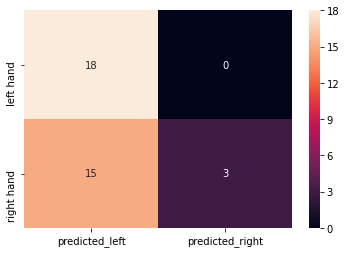

In [262]:
sns.heatmap(confusion, annot=True)

In [263]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

         0.0       1.00      0.17      0.29        18
         1.0       0.55      1.00      0.71        18

    accuracy                           0.58        36
   macro avg       0.77      0.58      0.50        36
weighted avg       0.77      0.58      0.50        36

